In [37]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import h5py
from tqdm import tqdm  # progress bar

import os
import time
import io
import base64

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from io import BytesIO

from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import timm
import albumentations as A
from albumentations.pytorch import ToTensorV2

import io
import torch
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import timm
import torch.nn as nn

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import os
import numpy as np
import torch
from tqdm import tqdm

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    balanced_accuracy_score,
    confusion_matrix,
    roc_auc_score
)

from sklearn.metrics import precision_recall_curve

from sklearn.metrics import precision_score, recall_score, fbeta_score

# Save if you want
# final_df.to_pickle("images.pkl")  # preserves raw bytes safely


In [25]:
#final_df["isic_id"].equals(df_tabular["isic_id"])

True

In [3]:
edgenext_preds = pd.read_pickle("/kaggle/input/img-preds/edgenext_preds.pkl")
edgenext_preds.head()

,id,prediction
0,ISIC_0015670,0.005510
1,ISIC_0015845,0.213351
2,ISIC_0015864,0.003092
3,ISIC_0015902,0.034764
4,ISIC_0024200,0.009865


In [5]:
eva02_preds = pd.read_pickle("/kaggle/input/img-preds/eva02_01_preds.pkl")
eva02_preds.head()

,id,prediction
0,ISIC_0015670,0.039354
1,ISIC_0015845,0.235056
2,ISIC_0015864,0.013793
3,ISIC_0015902,0.028597
4,ISIC_0024200,0.067254


In [8]:
eva02_preds["id"].equals(tabular_preds["isic_id"])

True

In [7]:
tabular_preds = pd.read_csv("/kaggle/input/tabular-preds/tabular_preds.csv")
tabular_preds.head()

,Unnamed: 0,lgbm_42,lgbm_52,lgbm_62,lgbm_72,lgbm_82,ensemble,target,isic_id
0,0,0.015197,0.012859,0.018430,0.014540,0.013881,0.014981,0,ISIC_0015670
1,1,0.994896,0.994877,0.994858,0.994904,0.994728,0.994852,0,ISIC_0015845
2,2,0.009457,0.008784,0.008883,0.007815,0.008454,0.008679,0,ISIC_0015864
3,3,0.017314,0.013926,0.014249,0.014940,0.013991,0.014884,0,ISIC_0015902
4,4,0.203507,0.222469,0.274706,0.196490,0.217909,0.223016,0,ISIC_0024200


In [24]:
df_preds = pd.DataFrame()
df_preds["id"] = tabular_preds["isic_id"]

df_preds[["lgbm_42","lgbm_52","lgbm_62","lgbm_72","lgbm_82","ensemble"]] = tabular_preds[["lgbm_42","lgbm_52","lgbm_62","lgbm_72","lgbm_82","ensemble"]]

df_preds["eva_1"] = eva02_preds["prediction"]
df_preds["edgenext"] = edgenext_preds["prediction"]

df_preds["labels"] = df_original["target"]

In [21]:
df_original = pd.read_csv(
    '/kaggle/input/donedeal/subject_data.csv',
    dtype={51: str, 52: str}
)



In [23]:
df_original["target"].equals(tabular_preds["target"])

True

In [25]:
df_preds.head()

,id,lgbm_42,lgbm_52,lgbm_62,lgbm_72,lgbm_82,ensemble,eva_1,edgenext,labels
0,ISIC_0015670,0.015197,0.012859,0.018430,0.014540,0.013881,0.014981,0.039354,0.005510,0
1,ISIC_0015845,0.994896,0.994877,0.994858,0.994904,0.994728,0.994852,0.235056,0.213351,0
2,ISIC_0015864,0.009457,0.008784,0.008883,0.007815,0.008454,0.008679,0.013793,0.003092,0
3,ISIC_0015902,0.017314,0.013926,0.014249,0.014940,0.013991,0.014884,0.028597,0.034764,0
4,ISIC_0024200,0.203507,0.222469,0.274706,0.196490,0.217909,0.223016,0.067254,0.009865,0


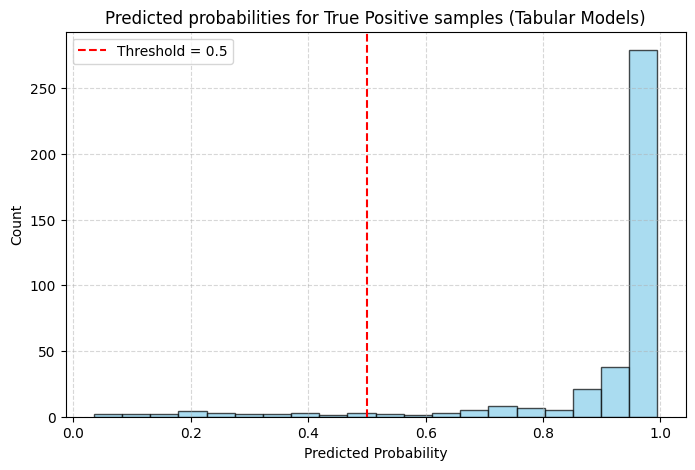

In [39]:
import matplotlib.pyplot as plt
import numpy as np

threshold = 0.5
# Convert to NumPy arrays if they aren't already
all_targets = np.array(df_preds["labels"])
all_preds = np.array(df_preds["ensemble"])

# Filter only true positive samples (actual label = 1)
true_positive_mask = (all_targets == 1)
true_positive_preds = all_preds[true_positive_mask]

# Plot histogram of predictions for true positives
plt.figure(figsize=(8, 5))
plt.hist(true_positive_preds, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', label=f"Threshold = {threshold}")
plt.title("Predicted probabilities for True Positive samples (Tabular Models)")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


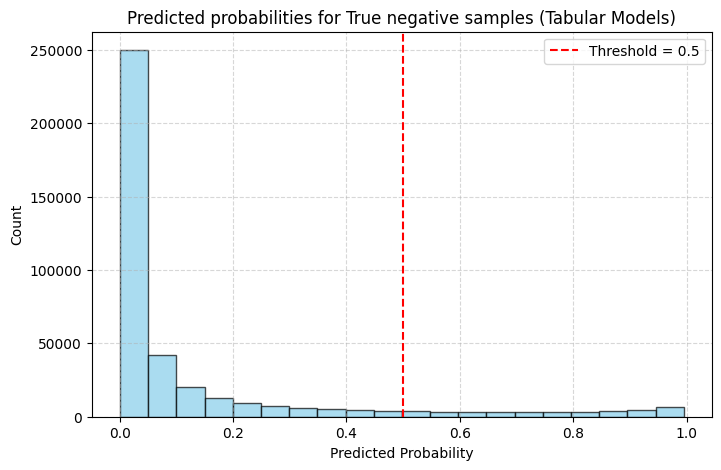

In [40]:
import matplotlib.pyplot as plt
import numpy as np

threshold = 0.5
# Convert to NumPy arrays if they aren't already
all_targets = np.array(df_preds["labels"])
all_preds = np.array(df_preds["ensemble"])

# Filter only true positive samples (actual label = 1)
true_positive_mask = (all_targets == 0)
true_positive_preds = all_preds[true_positive_mask]

# Plot histogram of predictions for true positives
plt.figure(figsize=(8, 5))
plt.hist(true_positive_preds, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', label=f"Threshold = {threshold}")
plt.title("Predicted probabilities for True negative samples (Tabular Models)")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [42]:
auc = roc_auc_score(all_targets, all_preds)

threshold = 0.5
pred_labels = (all_preds >= threshold).astype(int)

acc = accuracy_score(all_targets, pred_labels)
precision = precision_score(all_targets, pred_labels, zero_division=0)
recall = recall_score(all_targets, pred_labels, zero_division=0)

pred_labels = (all_preds >= threshold).astype(int)

f1 = fbeta_score(all_targets, pred_labels, beta=1)  # regular F1
f2 = fbeta_score(all_targets, pred_labels, beta=2)  # F2 score

balanced_acc = balanced_accuracy_score(all_targets, pred_labels)

cm = confusion_matrix(all_targets, pred_labels, labels=[0, 1])
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0

print(
    f"Precision: {precision:.4f} | Recall: {recall:.4f} | "
    f"F1: {f1:.4f} | F2: {f2:.4f} | Specificity: {specificity:.4f} | "
    f"TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}"
)
prec, rec, thresh = precision_recall_curve(all_targets, all_preds)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-8)  # avoid div by zero
best_thresh = thresh[np.argmax(f1_scores)]
print(f"Best threshold for F1 this epoch: {best_thresh:.4f}")

Precision: 0.0094 | Recall: 0.9415 | F1: 0.0186 | F2: 0.0452 | Specificity: 0.9027 | TP: 370, FP: 38974, FN: 23, TN: 361692
Best threshold for F1 this epoch: 0.9886


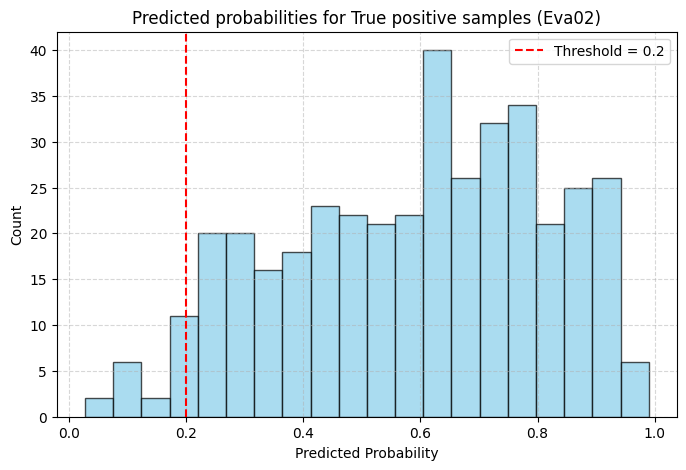

In [44]:


import matplotlib.pyplot as plt
import numpy as np

threshold = 0.2
# Convert to NumPy arrays if they aren't already
all_targets = np.array(df_preds["labels"])
all_preds = np.array(df_preds["eva_1"])

# Filter only true positive samples (actual label = 1)
true_positive_mask = (all_targets == 1)
true_positive_preds = all_preds[true_positive_mask]

# Plot histogram of predictions for true positives
plt.figure(figsize=(8, 5))
plt.hist(true_positive_preds, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', label=f"Threshold = {threshold}")
plt.title("Predicted probabilities for True positive samples (Eva02)")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


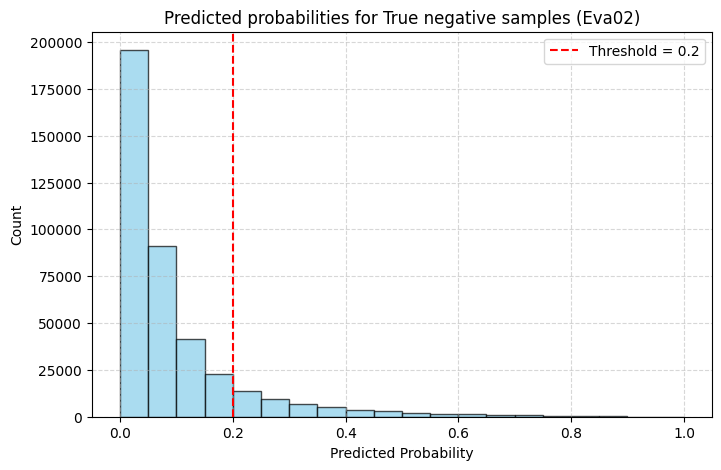

In [45]:
import matplotlib.pyplot as plt
import numpy as np

threshold = 0.2
# Convert to NumPy arrays if they aren't already
all_targets = np.array(df_preds["labels"])
all_preds = np.array(df_preds["eva_1"])

# Filter only true positive samples (actual label = 1)
true_positive_mask = (all_targets == 0)
true_positive_preds = all_preds[true_positive_mask]

# Plot histogram of predictions for true positives
plt.figure(figsize=(8, 5))
plt.hist(true_positive_preds, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', label=f"Threshold = {threshold}")
plt.title("Predicted probabilities for True negative samples (Eva02)")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



In [49]:
auc = roc_auc_score(all_targets, all_preds)

threshold = 0.2
pred_labels = (all_preds >= threshold).astype(int)

acc = accuracy_score(all_targets, pred_labels)
precision = precision_score(all_targets, pred_labels, zero_division=0)
recall = recall_score(all_targets, pred_labels, zero_division=0)

pred_labels = (all_preds >= threshold).astype(int)

f1 = fbeta_score(all_targets, pred_labels, beta=1)  # regular F1
f2 = fbeta_score(all_targets, pred_labels, beta=2)  # F2 score

balanced_acc = balanced_accuracy_score(all_targets, pred_labels)

cm = confusion_matrix(all_targets, pred_labels, labels=[0, 1])
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0

print(
    f"Precision: {precision:.4f} | Recall: {recall:.4f} | "
    f"F1: {f1:.4f} | F2: {f2:.4f} | Specificity: {specificity:.4f} | "
    f"TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}"
)
prec, rec, thresh = precision_recall_curve(all_targets, all_preds)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-8)  # avoid div by zero
best_thresh = thresh[np.argmax(f1_scores)]
print(f"Best threshold for F1 this epoch: {best_thresh:.4f}")

Precision: 0.0076 | Recall: 0.9644 | F1: 0.0150 | F2: 0.0367 | Specificity: 0.8760 | TP: 379, FP: 49670, FN: 14, TN: 350996
Best threshold for F1 this epoch: 0.8547


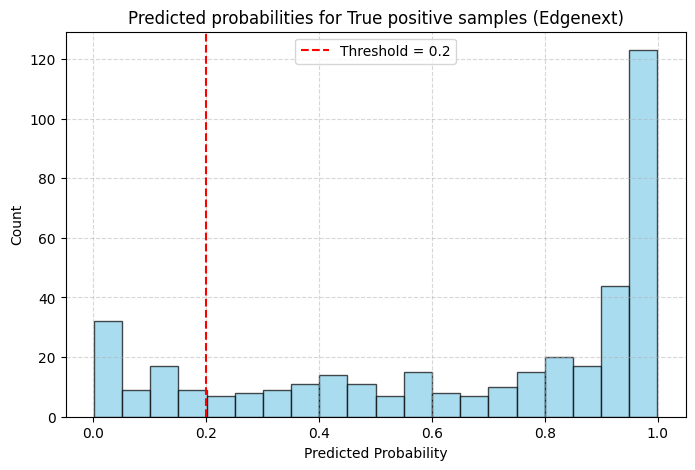

In [50]:
import matplotlib.pyplot as plt
import numpy as np

threshold = 0.2
# Convert to NumPy arrays if they aren't already
all_targets = np.array(df_preds["labels"])
all_preds = np.array(df_preds["edgenext"])

# Filter only true positive samples (actual label = 1)
true_positive_mask = (all_targets == 1)
true_positive_preds = all_preds[true_positive_mask]

# Plot histogram of predictions for true positives
plt.figure(figsize=(8, 5))
plt.hist(true_positive_preds, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', label=f"Threshold = {threshold}")
plt.title("Predicted probabilities for True positive samples (Edgenext)")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

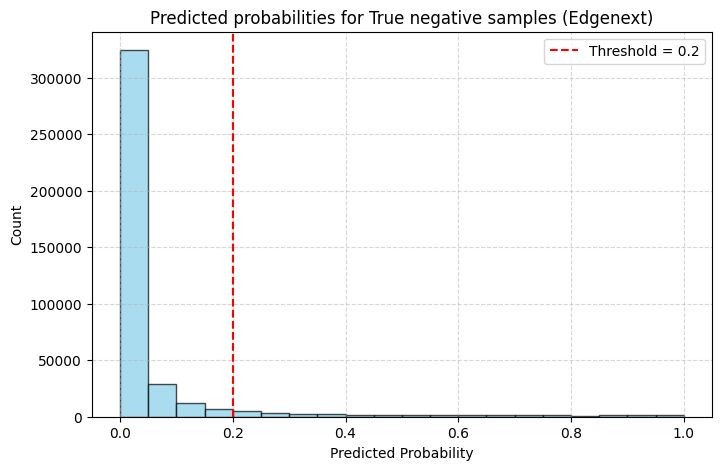

In [51]:
import matplotlib.pyplot as plt
import numpy as np

threshold = 0.2
# Convert to NumPy arrays if they aren't already
all_targets = np.array(df_preds["labels"])
all_preds = np.array(df_preds["edgenext"])

# Filter only true positive samples (actual label = 1)
true_positive_mask = (all_targets == 0)
true_positive_preds = all_preds[true_positive_mask]

# Plot histogram of predictions for true positives
plt.figure(figsize=(8, 5))
plt.hist(true_positive_preds, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', label=f"Threshold = {threshold}")
plt.title("Predicted probabilities for True negative samples (Edgenext)")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [52]:
auc = roc_auc_score(all_targets, all_preds)

threshold = 0.2
pred_labels = (all_preds >= threshold).astype(int)

acc = accuracy_score(all_targets, pred_labels)
precision = precision_score(all_targets, pred_labels, zero_division=0)
recall = recall_score(all_targets, pred_labels, zero_division=0)

pred_labels = (all_preds >= threshold).astype(int)

f1 = fbeta_score(all_targets, pred_labels, beta=1)  # regular F1
f2 = fbeta_score(all_targets, pred_labels, beta=2)  # F2 score

balanced_acc = balanced_accuracy_score(all_targets, pred_labels)

cm = confusion_matrix(all_targets, pred_labels, labels=[0, 1])
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0

print(
    f"Precision: {precision:.4f} | Recall: {recall:.4f} | "
    f"F1: {f1:.4f} | F2: {f2:.4f} | Specificity: {specificity:.4f} | "
    f"TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}"
)
prec, rec, thresh = precision_recall_curve(all_targets, all_preds)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-8)  # avoid div by zero
best_thresh = thresh[np.argmax(f1_scores)]
print(f"Best threshold for F1 this epoch: {best_thresh:.4f}")

Precision: 0.0112 | Recall: 0.8295 | F1: 0.0220 | F2: 0.0530 | Specificity: 0.9280 | TP: 326, FP: 28864, FN: 67, TN: 371802
Best threshold for F1 this epoch: 0.9720


In [53]:
df_preds.to_pickle("all_preds.pkl")